In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(rc={'figure.figsize':(11, 4)})


#read CSV file
df = pd.read_csv('dataOrig.csv', index_col='Date', parse_dates=True)

df = df.drop(['P2VFDOutput','P1VFDOutput','ChWaterPrs'], axis=1)

print(df.head())
print(df.describe())

                     Demand   OAT
Date                             
2018-02-18 10:45:00    24.0  31.9
2018-02-18 10:50:00    24.0  31.9
2018-02-18 10:55:00    24.0  31.9
2018-02-18 11:00:00    24.0  31.6
2018-02-18 11:05:00    30.0  31.6
              Demand            OAT
count  105175.000000  105175.000000
mean       45.599886      48.433107
std        31.632237      22.730153
min         0.000000     -25.700000
25%        24.000000      30.200000
50%        30.000000      45.800000
75%        60.000000      68.100000
max       228.000000     104.000000


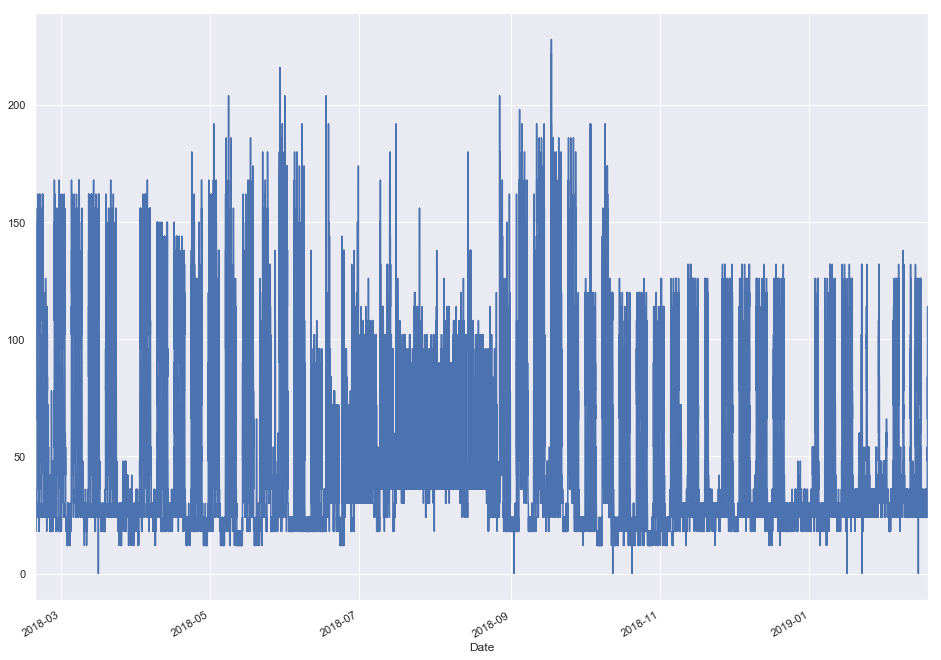

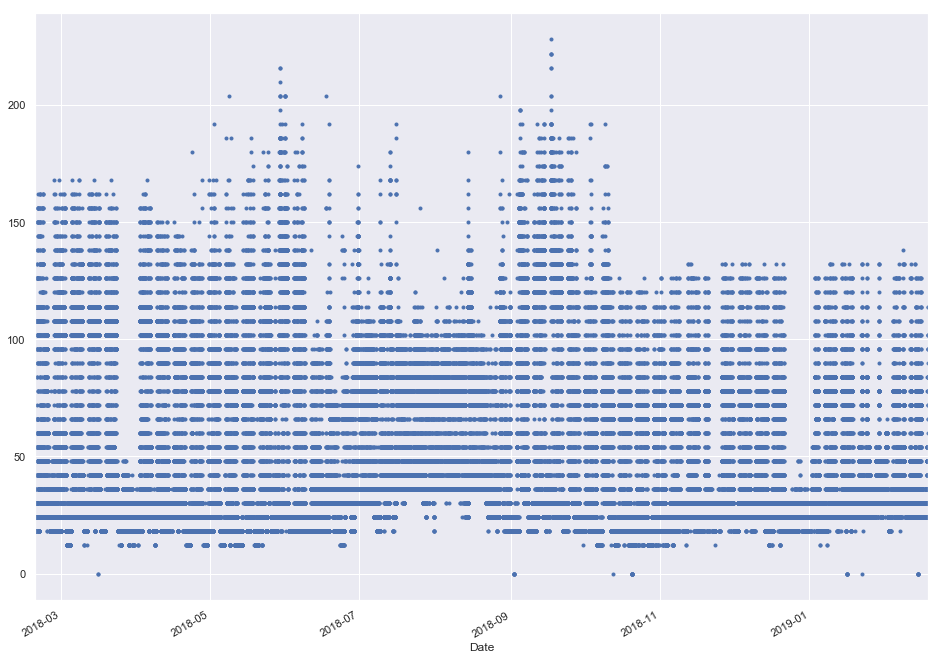

In [2]:
df['Demand'].plot(figsize=(16, 12))
plt.show()

df['Demand'].plot(marker='.', alpha=1, linestyle='None', figsize=(16, 12))

plt.show()

In [3]:
df = df[(df[['Demand']] != 0).all(axis=1)]

df.describe()

,Demand,OAT
count,105143.000000,105143.000000
mean,45.613764,48.435149
std,31.627044,22.731820
min,12.000000,-25.700000
25%,24.000000,30.200000
50%,30.000000,45.800000
75%,60.000000,68.100000
max,228.000000,104.000000


In [4]:
#resample data for hourly data

hourly_summary = pd.DataFrame()

hourly_summary['OAT'] = df['OAT'].resample('H').mean()
hourly_summary['Demand'] = df['Demand'].resample('H').mean()
#hourly_summary['ChWaterPrs'] = df['ChWaterPrs'].resample('H').mean()
#hourly_summary['P1VFDOutput'] = df['P1VFDOutput'].resample('H').mean()
#hourly_summary['P2VFDOutput'] = df['P2VFDOutput'].resample('H').mean()

hourly_summary.head()

,OAT,Demand
Date,,
2018-02-18 10:00:00,31.900000,24.0
2018-02-18 11:00:00,31.650000,26.0
2018-02-18 12:00:00,32.683333,25.5
2018-02-18 13:00:00,35.200000,20.0
2018-02-18 14:00:00,36.366667,21.0


In [5]:
hourly_summary.describe()


,OAT,Demand
count,8760.000000,8760.000000
mean,48.434942,45.605516
std,22.721150,29.795219
min,-25.483333,12.500000
25%,30.166667,24.000000
50%,45.866667,32.500000
75%,68.116667,60.500000
max,102.966667,196.500000


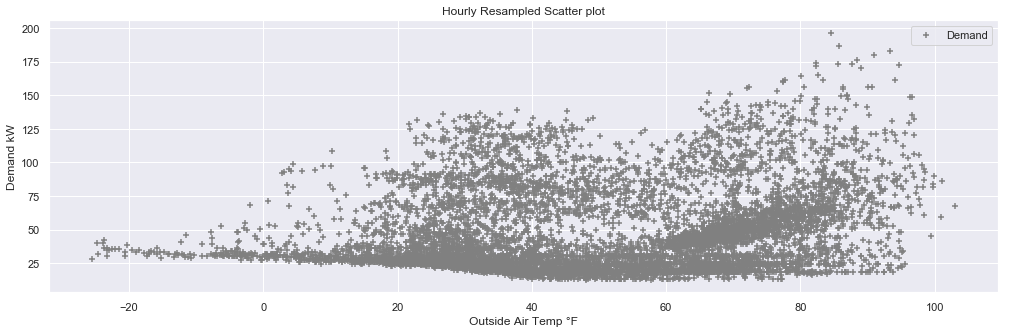

In [6]:
plt.figure(figsize=(17,5))

plt.scatter(hourly_summary['OAT'], hourly_summary['Demand'], color='grey', marker='+') 
 
plt.xlabel('Outside Air Temp °F')
plt.ylabel('Demand kW')
plt.title('Hourly Resampled Scatter plot')
 
plt.legend()
 
plt.show()

In [7]:
idx = hourly_summary.groupby(hourly_summary.index.normalize())['Demand'].idxmax()
df2 = hourly_summary.loc[idx]

# get the hour
df2['hour'] = df2.index.hour

# set date as index
df2.index = df2.index.normalize()

In [8]:
df2.head()

,OAT,Demand,hour
Date,,,
2018-02-18,32.816667,30.000000,18
2018-02-19,37.750000,138.999999,12
2018-02-20,42.600000,129.499999,12
2018-02-21,26.750000,135.999999,12
2018-02-22,33.533333,104.999999,17


In [9]:
df2.describe()

,OAT,Demand,hour
count,366.000000,366.000000,366.000000
mean,51.833743,82.193989,11.704918
std,25.139021,41.595532,4.926343
min,-23.766667,17.000000,0.000000
25%,30.787500,36.250000,10.000000
50%,47.641667,91.500000,12.000000
75%,74.687500,110.749999,14.000000
max,101.083333,196.500000,23.000000


In [10]:
#create dummy variables
df2['month'] = df2.index.month
df2['day_of_week'] = df2.index.dayofweek

print(df2.head())
print(df2.describe())

                  OAT      Demand  hour  month  day_of_week
Date                                                       
2018-02-18  32.816667   30.000000    18      2            6
2018-02-19  37.750000  138.999999    12      2            0
2018-02-20  42.600000  129.499999    12      2            1
2018-02-21  26.750000  135.999999    12      2            2
2018-02-22  33.533333  104.999999    17      2            3
              OAT      Demand        hour       month  day_of_week
count  366.000000  366.000000  366.000000  366.000000   366.000000
mean    51.833743   82.193989   11.704918    6.513661     3.000000
std     25.139021   41.595532    4.926343    3.455958     2.009566
min    -23.766667   17.000000    0.000000    1.000000     0.000000
25%     30.787500   36.250000   10.000000    4.000000     1.000000
50%     47.641667   91.500000   12.000000    7.000000     3.000000
75%     74.687500  110.749999   14.000000    9.750000     5.000000
max    101.083333  196.500000   23.000000   

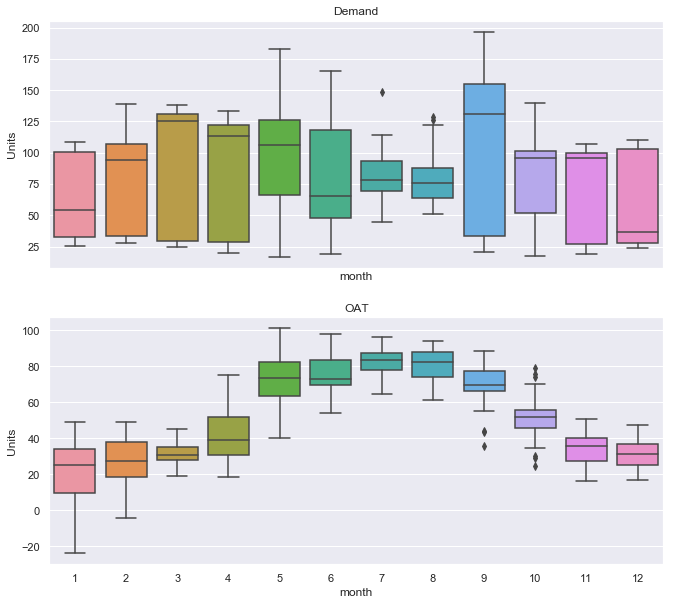

In [11]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Demand', 'OAT'], axes):
    sns.boxplot(data=df2, x='month', y=name, ax=ax)
    ax.set_ylabel('Units')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

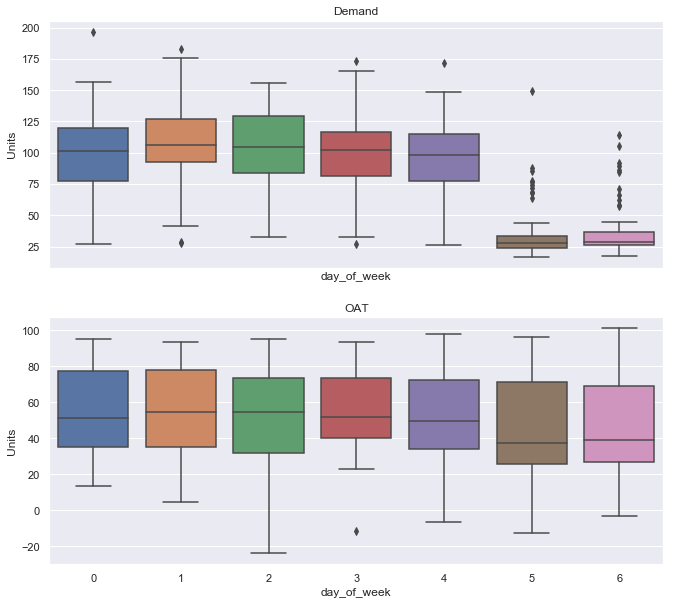

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Demand', 'OAT'], axes):
    sns.boxplot(data=df2, x='day_of_week', y=name, ax=ax)
    ax.set_ylabel('Units')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

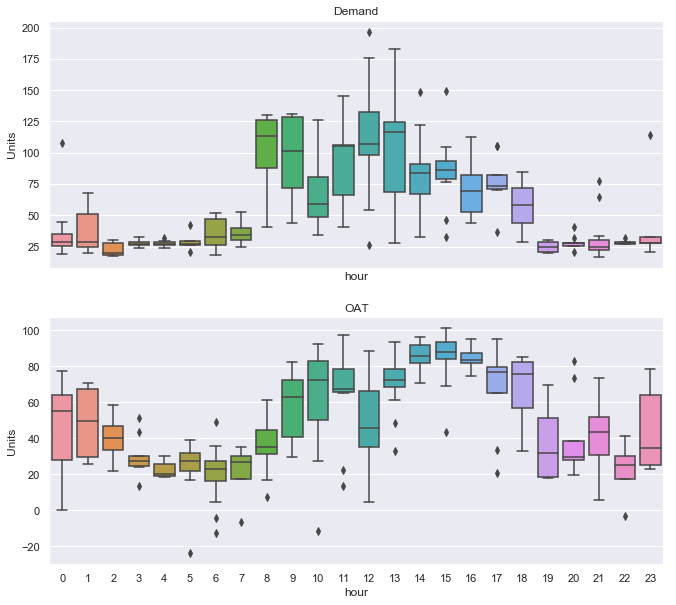

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Demand', 'OAT'], axes):
    sns.boxplot(data=df2, x='hour', y=name, ax=ax)
    ax.set_ylabel('Units')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

In [14]:
df2.to_csv('resampledDaily.csv')

In [15]:
print('df2 shape is:', df2.shape)
print('df2 null check =', df2.isnull().sum().sum())

df2 shape is: (366, 5)
df2 null check = 0


In [18]:
df2.Demand = df2.Demand.round(1)
df2.OAT = df2.OAT.round(1)

In [19]:
#shuffled data
df2 = df2.sample(frac=1.0)

In [20]:
#find correlation of kW Vs other df's
print(df2.corr()['Demand'].sort_values())

day_of_week   -0.555146
month         -0.034743
hour           0.118011
OAT            0.336373
Demand         1.000000
Name: Demand, dtype: float64


In [22]:
#find correlation of Hour Vs other df's
print(df2.corr()['hour'].sort_values())

day_of_week   -0.064758
Demand         0.118011
month          0.118676
OAT            0.281842
hour           1.000000
Name: hour, dtype: float64


In [23]:
#Test Decision Tree Regressor 
#from sklearn import preprocessing, cross_validation, neighbors
from sklearn import preprocessing, neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
import math
import numpy as np
 
rmses = []
for i in range(3):
    aux_df = df2
 
    X = np.array(aux_df.drop(['hour'],1))
    y = np.array(aux_df['hour'])
 
    offset = int(X.shape[0] * 0.7)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
 
    #clf = DecisionTreeRegressor(random_state=300, min_samples_leaf=150)
    clf = DecisionTreeRegressor()
 
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, clf.predict(X_test))
    rmse = math.sqrt(mse)
    print("rmse: %.4f" % rmse)
    rmses.append(rmse)
 
print(sum(rmses)/len(rmses))

rmse: 6.9518
rmse: 6.7676
rmse: 6.7904
6.836573072517787


In [24]:
#Test random Forest

import numpy as np
from sklearn import preprocessing, neighbors
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
import math
 
rmses = []
for i in range(3):
    aux_df = df2
 
    X = np.array(aux_df.drop(['hour'],1))
    y = np.array(aux_df['hour'])
 
    offset = int(X.shape[0] * 0.7)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
 
    clf = RandomForestRegressor(n_estimators=60, min_samples_split=6)
 
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, clf.predict(X_test))
    rmse = math.sqrt(mse)
    print("rmse: %.4f" % rmse)
    rmses.append(rmse)
 
print(sum(rmses)/len(rmses))

#joblib.dump(clf, 'rfrModel.pkl')

rmse: 5.0283
rmse: 5.0939
rmse: 5.0361
5.0527655534240825


In [25]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge
from sklearn import preprocessing, neighbors
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import mean_squared_error
import math
 
rmses = []
for i in range(3):
    aux_df = df2
 
    X = np.array(aux_df.drop(['hour'],1))
    y = np.array(aux_df['hour'])
 
    offset = int(X.shape[0] * 0.7)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
 
    clf = BayesianRidge()
 
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, clf.predict(X_test))
    rmse = math.sqrt(mse)
    print("rmse: %.4f" % rmse)
    rmses.append(rmse)
 
print(sum(rmses)/len(rmses))

rmse: 4.7968
rmse: 4.7968
rmse: 4.7968
4.796790786159324


In [26]:
#Test NN, https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
from sklearn import preprocessing, neighbors
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_squared_error
import math
 
rmses = []
for i in range(3):
    aux_df = df2
 
    X = np.array(aux_df.drop(['hour'],1))
    y = np.array(aux_df['hour'])
 
    offset = int(X.shape[0] * 0.7)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
 
    clf = MLPRegressor(hidden_layer_sizes = (120, 88, 66, 44, 22, 18, 12, 8), activation = 'relu', solver = 'adam', 
                       learning_rate = 'adaptive', alpha = 1, random_state = 1)
 
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, clf.predict(X_test))
    rmse = math.sqrt(mse)
    print("rmse: %.4f" % rmse)
    rmses.append(rmse)
 
print(sum(rmses)/len(rmses))

#12.6024 with constant learning rate
#    clf = MLPRegressor(hidden_layer_sizes = (100, 75, 50, 25), activation = 'relu', solver = 'sgd', 
                       #learning_rate = 'adaptive', alpha = 1, random_state = 1)
    
#    clf = MLPRegressor(hidden_layer_sizes = (120, 88, 66, 44, 22, 18, 12, 8), activation = 'relu', solver = 'adam',
                      #learning_rate = 'constant', alpha = 1e-5, random_state = 1)

rmse: 5.1904
rmse: 5.1904
rmse: 5.1904
5.1904232103318515


In [27]:
#Test KNN, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
from sklearn import preprocessing, neighbors
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
import math
 
rmses = []
for i in range(3):
    aux_df = df2
 
    X = np.array(aux_df.drop(['hour'],1))
    y = np.array(aux_df['hour'])
 
    offset = int(X.shape[0] * 0.7)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
 
    clf = KNeighborsRegressor(n_neighbors=15,leaf_size=550)
 
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, clf.predict(X_test))
    rmse = math.sqrt(mse)
    print("rmse: %.4f" % rmse)
    rmses.append(rmse)
 
print(sum(rmses)/len(rmses))

rmse: 5.1181
rmse: 5.1181
rmse: 5.1181
5.11811202564683


In [29]:
#test support vector machine regressor

from sklearn import preprocessing, neighbors
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error
import math
 
rmses = []
for i in range(3):
    aux_df = df2
 
    X = np.array(aux_df.drop(['hour'],1))
    y = np.array(aux_df['hour'])
 
 

    X = np.array(aux_df.drop(['Demand'],1))
    y = np.array(aux_df['Demand'])
 
    offset = int(X.shape[0] * 0.7)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
 
    #clf = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    clf = SVR()
 
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, clf.predict(X_test))
    rmse = math.sqrt(mse)
    print("rmse: %.4f" % rmse)
    rmses.append(rmse)
 
print(sum(rmses)/len(rmses))

rmse: 42.2545
rmse: 42.2545
rmse: 42.2545
42.254532267806376


C:\Users\benb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
